In [1]:
using DataFrames
using Plots
using CategoricalArrays
using Random
using Imbalance
using MLJBase: machine, transform
using TableTransforms

include("./utils.jl")

plot_data

### 1. Generate Random Data

In [2]:
rng = Random.default_rng()

type="DF"
num_rows = 50
num_features = 5
probs = [0.5, 0.2, 0.3]
y_ind = 3

Xy, _ = generate_imbalanced_data(num_rows, num_features; probs, type, insert_y=y_ind, rng=42)
X, y = generate_imbalanced_data(num_rows, num_features; probs, type, rng=42)

(50×5 DataFrame
 Row │ x1         x2        x3         x4         x5        
     │ Float64    Float64   Float64    Float64    Float64   
─────┼──────────────────────────────────────────────────────
   1 │ 0.402423   0.276647  0.677588   0.181507   0.68816
   2 │ 0.166342   0.041566  0.987747   0.915338   0.549958
   3 │ 0.712044   0.867301  0.122297   0.668053   0.383427
   4 │ 0.104502   0.631324  0.657632   0.689746   0.170453
   5 │ 0.185399   0.339685  0.341166   0.485285   0.592237
   6 │ 0.853802   0.248339  0.526458   0.917124   0.843321
   7 │ 0.0956922  0.156636  0.411761   0.774802   0.50602
   8 │ 0.871985   0.894245  0.434646   0.886202   0.797667
  ⋮  │     ⋮         ⋮          ⋮          ⋮          ⋮
  44 │ 0.0183175  0.702445  0.61795    0.916099   0.747168
  45 │ 0.428426   0.651046  0.417615   0.193855   0.56267
  46 │ 0.696682   0.384797  0.263962   0.489428   0.264571
  47 │ 0.552491   0.659169  0.93456    0.771435   0.922951
  48 │ 0.229571   0.500692  0.213247   0

### 2. Apply RandomOversampler

#### Using Imbalance Only

In [3]:
Xover, yover = random_oversample(X, y; ratios = Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng = 42)

(72×5 DataFrame
 Row │ x1         x2         x3        x4         x5       
     │ Float64    Float64    Float64   Float64    Float64  
─────┼─────────────────────────────────────────────────────
   1 │ 0.402423   0.276647   0.677588  0.181507   0.68816
   2 │ 0.166342   0.041566   0.987747  0.915338   0.549958
   3 │ 0.712044   0.867301   0.122297  0.668053   0.383427
   4 │ 0.104502   0.631324   0.657632  0.689746   0.170453
   5 │ 0.185399   0.339685   0.341166  0.485285   0.592237
   6 │ 0.853802   0.248339   0.526458  0.917124   0.843321
   7 │ 0.0956922  0.156636   0.411761  0.774802   0.50602
   8 │ 0.871985   0.894245   0.434646  0.886202   0.797667
  ⋮  │     ⋮          ⋮         ⋮          ⋮         ⋮
  66 │ 0.699532   0.813058   0.580492  0.118173   0.867556
  67 │ 0.711371   0.742757   0.741117  0.583145   0.343326
  68 │ 0.428426   0.651046   0.417615  0.193855   0.56267
  69 │ 0.867305   0.644305   0.694669  0.352212   0.972384
  70 │ 0.844207   0.681252   0.565049  0.122

#### Using MLJ

In [4]:
naive_model = RandomOversampler(ratios=Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng=42)
mach = machine(naive_model)
Xover, yover = transform(mach, X, y)

(72×5 DataFrame
 Row │ x1         x2         x3        x4         x5       
     │ Float64    Float64    Float64   Float64    Float64  
─────┼─────────────────────────────────────────────────────
   1 │ 0.402423   0.276647   0.677588  0.181507   0.68816
   2 │ 0.166342   0.041566   0.987747  0.915338   0.549958
   3 │ 0.712044   0.867301   0.122297  0.668053   0.383427
   4 │ 0.104502   0.631324   0.657632  0.689746   0.170453
   5 │ 0.185399   0.339685   0.341166  0.485285   0.592237
   6 │ 0.853802   0.248339   0.526458  0.917124   0.843321
   7 │ 0.0956922  0.156636   0.411761  0.774802   0.50602
   8 │ 0.871985   0.894245   0.434646  0.886202   0.797667
  ⋮  │     ⋮          ⋮         ⋮          ⋮         ⋮
  66 │ 0.699532   0.813058   0.580492  0.118173   0.867556
  67 │ 0.711371   0.742757   0.741117  0.583145   0.343326
  68 │ 0.428426   0.651046   0.417615  0.193855   0.56267
  69 │ 0.867305   0.644305   0.694669  0.352212   0.972384
  70 │ 0.844207   0.681252   0.565049  0.122

#### Using TableTransforms

In [5]:
naive_model_t = RandomOversampler_t(y_ind, ratios=Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng=42)
Xyover = Xy |> naive_model_t

Row,x1,x2,x3,x4,x5,x6
,Float64,Float64,Float64,Float64,Float64,Float64
1,0.402423,0.276647,1.0,0.677588,0.181507,0.68816
2,0.166342,0.041566,0.0,0.987747,0.915338,0.549958
3,0.712044,0.867301,2.0,0.122297,0.668053,0.383427
4,0.104502,0.631324,2.0,0.657632,0.689746,0.170453
5,0.185399,0.339685,0.0,0.341166,0.485285,0.592237
6,0.853802,0.248339,2.0,0.526458,0.917124,0.843321
7,0.0956922,0.156636,0.0,0.411761,0.774802,0.50602
8,0.871985,0.894245,2.0,0.434646,0.886202,0.797667
9,0.385502,0.106014,2.0,0.842916,0.132062,0.273538


### 3. Plot the Results

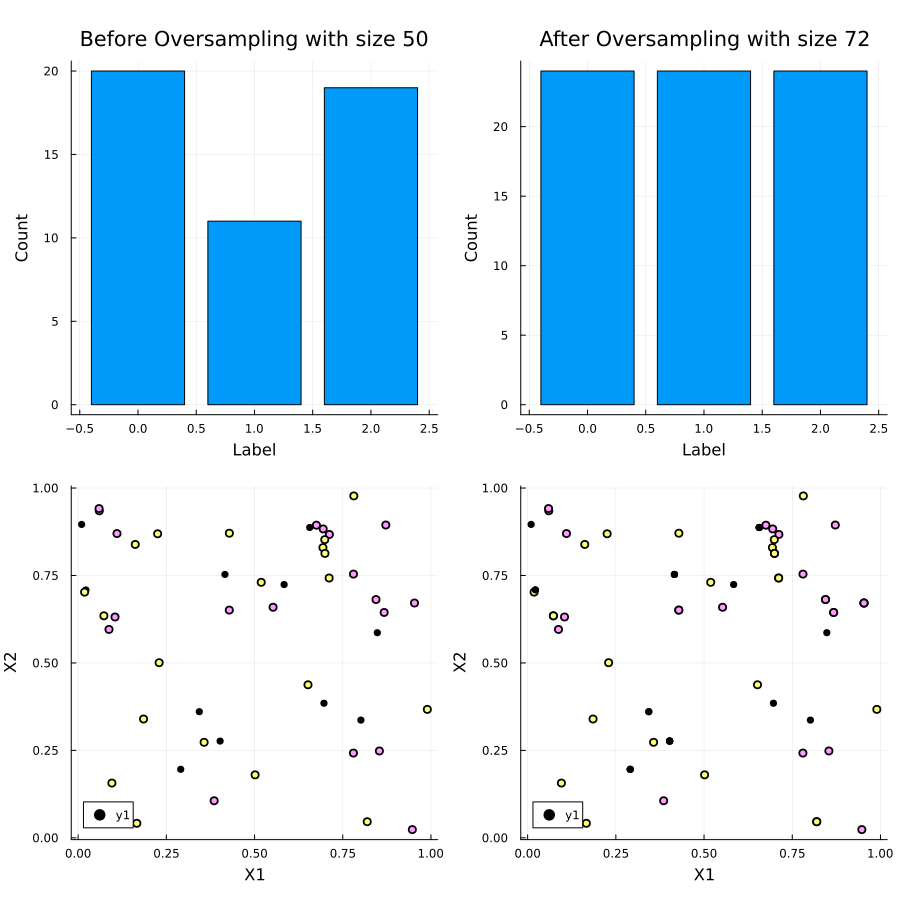

In [6]:
plot_data(y, yover, X, Xover)